<a href="https://colab.research.google.com/github/Ayuniarfina/Final-Project-Bangkit---JKT4-B/blob/Deni-branch/basemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Base model

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import zipfile
zipref = zipfile.ZipFile('/content/gdrive/My Drive/Data Colab/faceexp.zip')
zipref.extractall('/tmp/dataset')

In [4]:
import tensorflow as tf
import collections
import matplotlib.pyplot as plt

In [5]:
train_dir = ('/tmp/dataset/images/images/train')
test_dir = ('/tmp/dataset/images/images/validation')

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

traingenerator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical'
)

testgenerator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    class_mode='categorical',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


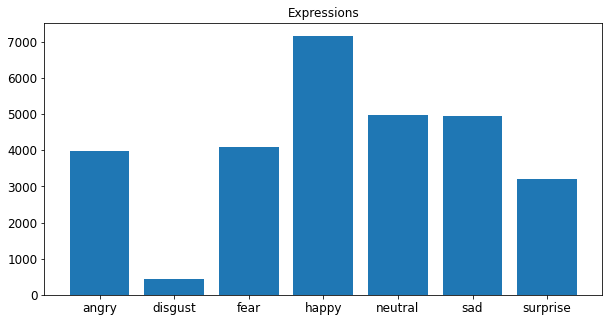

Counter({3: 7164, 4: 4982, 5: 4938, 2: 4103, 0: 3993, 6: 3205, 1: 436})


In [23]:
trainset = collections.Counter(traingenerator.classes)
plt.figure(figsize=(10,5))
plt.bar(trainset.keys(), trainset.values())
xlabel = ['angry','disgust','fear','happy','neutral','sad','surprise']
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=xlabel)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.title('Expressions')
plt.show()

print(trainset)

In [33]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(48,48,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
history = model.fit(traingenerator, validation_data=testgenerator, epochs=25)

Epoch 1/25
901/901 [==============================] - 11s 12ms/step - loss: 1.7068 - acc: 0.3151 - val_loss: 1.5464 - val_acc: 0.4007
Epoch 2/25
901/901 [==============================] - 10s 12ms/step - loss: 1.5016 - acc: 0.4204 - val_loss: 1.5251 - val_acc: 0.4222
Epoch 3/25
901/901 [==============================] - 11s 12ms/step - loss: 1.4296 - acc: 0.4515 - val_loss: 1.4141 - val_acc: 0.4571
Epoch 4/25
901/901 [==============================] - 11s 12ms/step - loss: 1.3744 - acc: 0.4733 - val_loss: 1.3681 - val_acc: 0.4795
Epoch 5/25
901/901 [==============================] - 11s 12ms/step - loss: 1.3312 - acc: 0.4886 - val_loss: 1.3541 - val_acc: 0.4884
Epoch 6/25
901/901 [==============================] - 11s 12ms/step - loss: 1.3013 - acc: 0.5009 - val_loss: 1.3327 - val_acc: 0.4900
Epoch 7/25
901/901 [==============================] - 11s 12ms/step - loss: 1.2734 - acc: 0.5126 - val_loss: 1.3286 - val_acc: 0.4856
Epoch 8/25
901/901 [==============================] - 11s 12ms

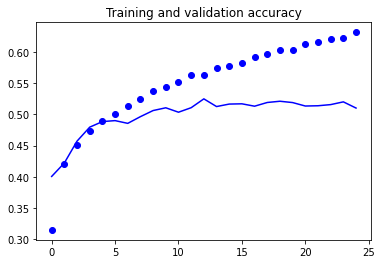

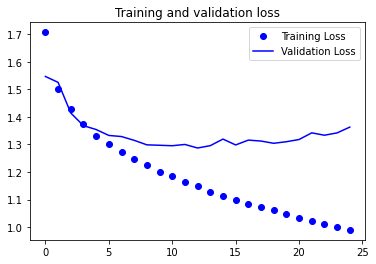

In [40]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.plot(figsize=(10,5))
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
# Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import random

In [75]:
# Using test generator dataset
Y_pred = model.predict(testgenerator)
y_pred = np.argmax(Y_pred, axis=1)

actual = collections.Counter(testgenerator.classes)
prediction = collections.Counter(y_pred)

X = ['angry','disgust','fear','happy','neutral','sad','surprise']
Y=[]
Z=[]

for i in range(len(xlabel)):
  Y.append(actual[i])
  Z.append(prediction[i])

In [92]:
print('actual:',actual)
print('prediction:',prediction)

actual: Counter({3: 1825, 4: 1216, 5: 1139, 2: 1018, 0: 960, 6: 797, 1: 111})
prediction: Counter({3: 2234, 5: 1322, 4: 1063, 2: 995, 6: 784, 0: 593, 1: 75})


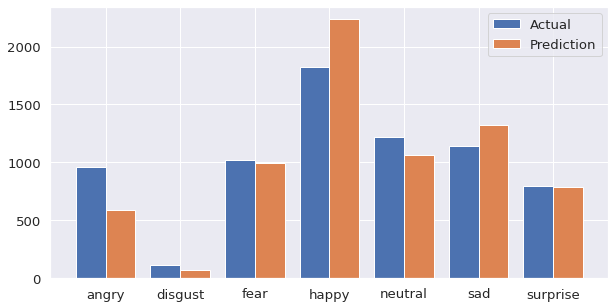

In [89]:
def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    plt.figure(figsize=(10,5))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.legend(['Actual', 'Prediction'])
    plt.xticks(_X, X)
    
subcategorybar(X, [Y,Z])

plt.show()

Total Images:  7066
Number of Images Missclassified:  3462
 


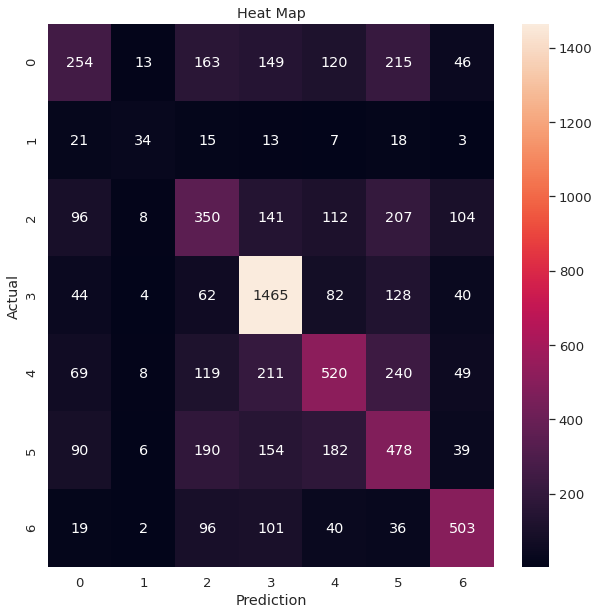

In [93]:
import seaborn as sn
import pandas as pd

print('Total Images: ',len(tes1))
print('Number of Images Missclassified: ',y)
print(' ')


array= confusion_matrix(testgenerator.classes,y_pred)

plt.subplots(figsize=(10,10))
df_cm=pd.DataFrame(array, range(7),range(7))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Heat Map')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [95]:
# Hitung Accuracy per class, manual
#actual: Counter({3: 1825, 4: 1216, 5: 1139, 2: 1018, 0: 960, 6: 797, 1: 111})
print('0: ', 254/960 )
print('1: ', 34/111)
print('2: ', 350/1018)
print('3: ', 1465/1825)
print('4: ', 520/1216)
print('5: ', 478/1139)
print('6: ', 503/797)

0:  0.26458333333333334
1:  0.3063063063063063
2:  0.343811394891945
3:  0.8027397260273973
4:  0.4276315789473684
5:  0.4196663740122915
6:  0.6311166875784191


In [96]:
# Classification Report

target_names = ['angry','disgust','fear','happy','neutral','sad','surprise']
print(classification_report(testgenerator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       angry       0.43      0.26      0.33       960
     disgust       0.45      0.31      0.37       111
        fear       0.35      0.34      0.35      1018
       happy       0.66      0.80      0.72      1825
     neutral       0.49      0.43      0.46      1216
         sad       0.36      0.42      0.39      1139
    surprise       0.64      0.63      0.64       797

    accuracy                           0.51      7066
   macro avg       0.48      0.46      0.46      7066
weighted avg       0.50      0.51      0.50      7066



In [46]:
# Plot Random N Missclassified Images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

tes1 = testgenerator.classes
tes2 = y_pred
diff = tes1-tes2

actual: angry / prediction: sad


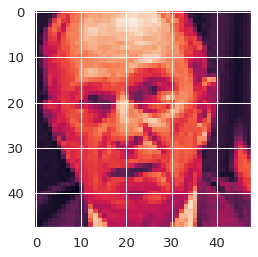

actual: happy / prediction: sad


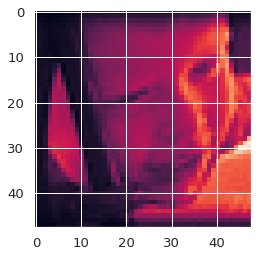

actual: surprise / prediction: happy


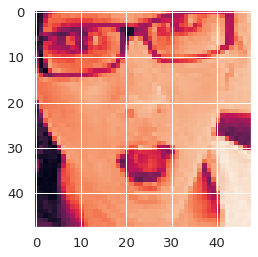

actual: sad / prediction: happy


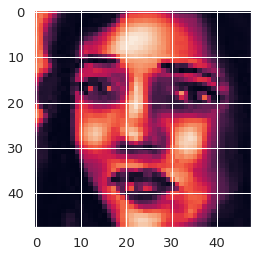

actual: sad / prediction: neutral


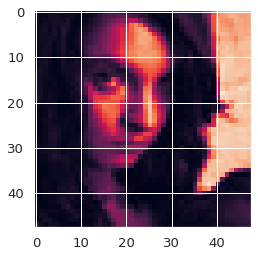

actual: happy / prediction: angry


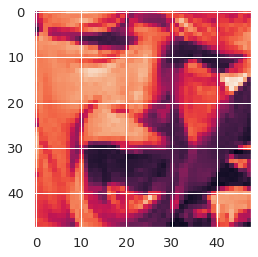

actual: sad / prediction: neutral


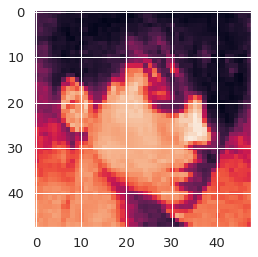

actual: sad / prediction: happy


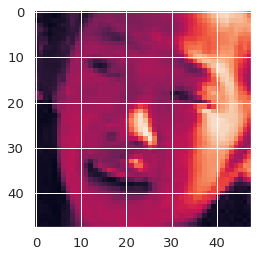

actual: sad / prediction: happy


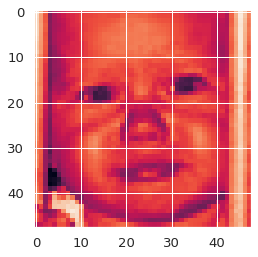

actual: fear / prediction: sad


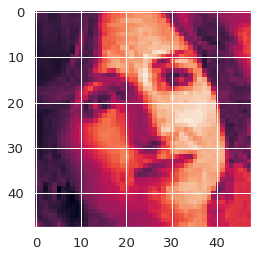

actual: fear / prediction: sad


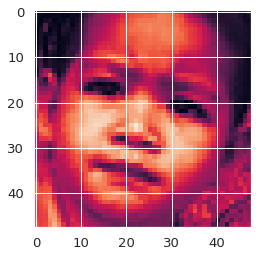

actual: fear / prediction: angry


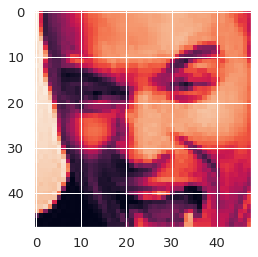

actual: angry / prediction: sad


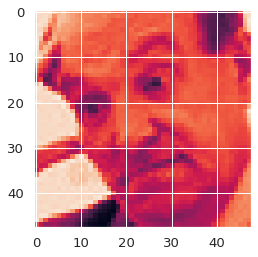

actual: angry / prediction: neutral


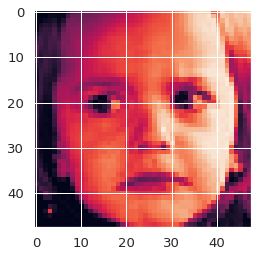

actual: fear / prediction: sad


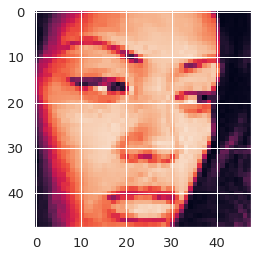

actual: happy / prediction: sad


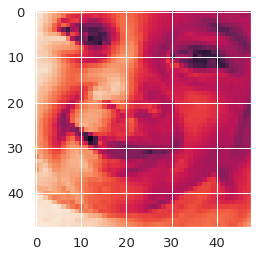

actual: fear / prediction: sad


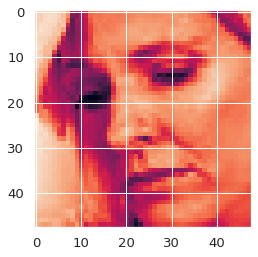

actual: happy / prediction: fear


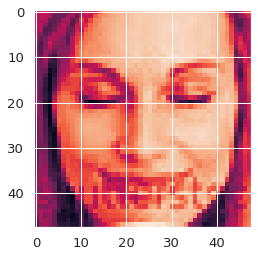

actual: angry / prediction: fear


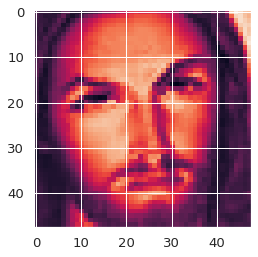

actual: sad / prediction: neutral


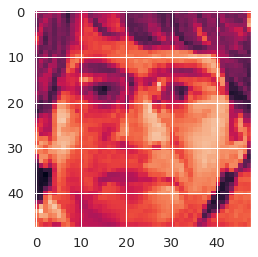

In [152]:
#Initiatialize
x=[]
y=0
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']
#Calculate False Prediction Location (x)
for i in range(len(diff)):
  if diff[i]>0 or diff[i]<0:
    x.append(i)
    y+=1

#Print N Random Misclassified Images (limit==N)
limit=0
dir = ('/tmp/dataset/images/images/validation')
while True:
  limit+=1
  nomor = random.sample(x,1)
  print(#testgenerator.filenames[(nomor[0])],
        'actual:', labels[tes1[(nomor[0])]], '/ prediction:', labels[tes2[(nomor[0])]])
  plt.imshow(mpimg.imread(dir+'/'+testgenerator.filenames[(nomor[0])]))
  plt.show()

  if limit == 20:
    break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


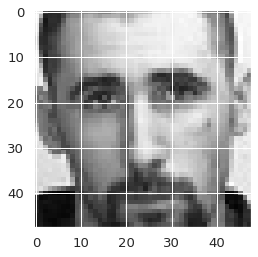

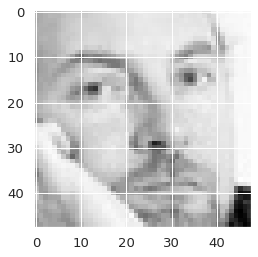

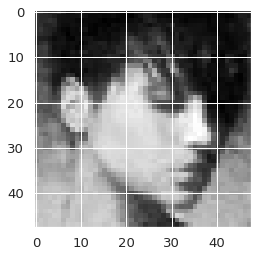

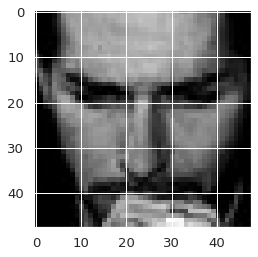

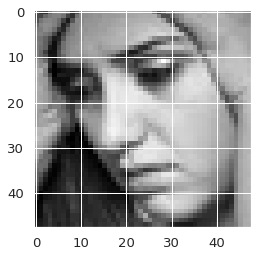

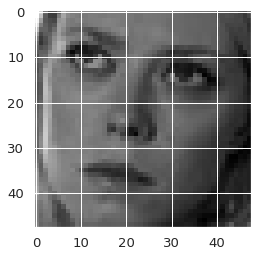

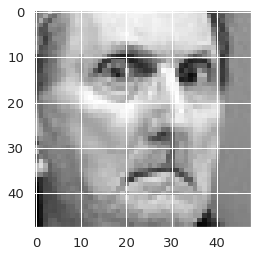

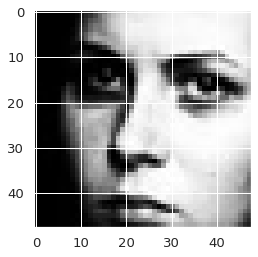

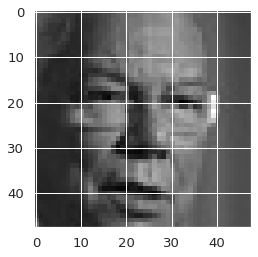

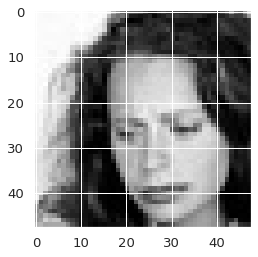

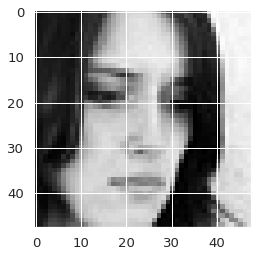

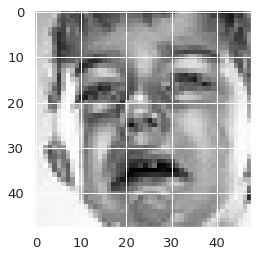

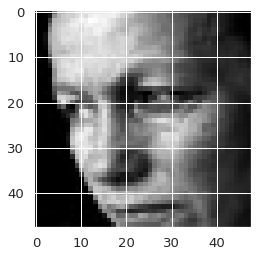

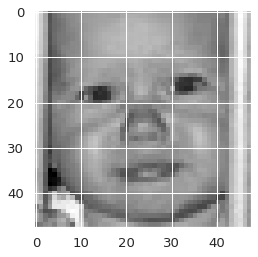

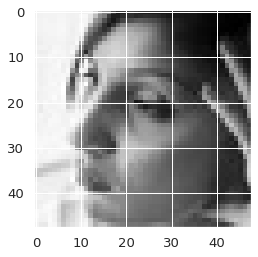

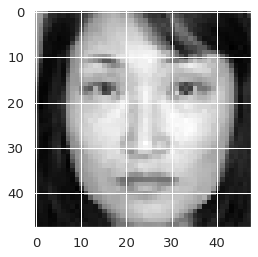

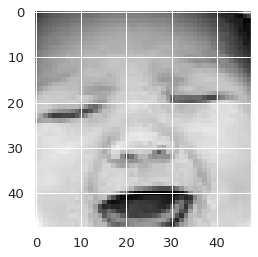

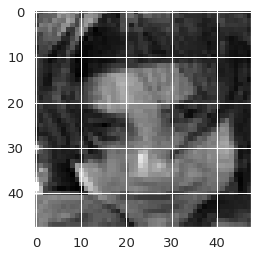

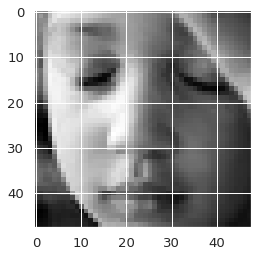

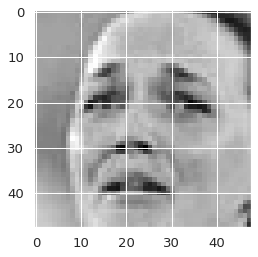

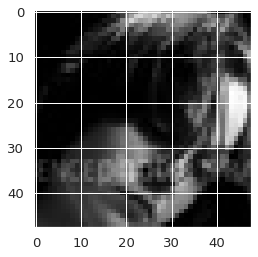

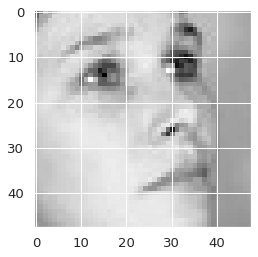

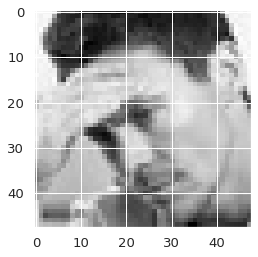

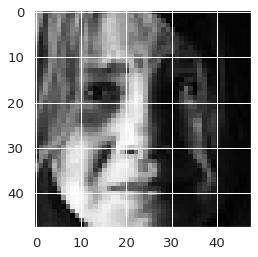

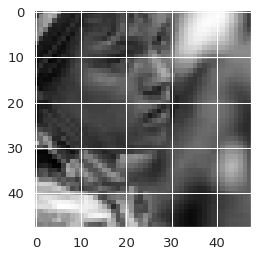

In [142]:
basedir = ('/tmp/dataset/images/images/validation/')
expression = ('sad')
nsample = 25
import os
listname = os.listdir(basedir+expression)
test = random.sample(listname, nsample)
tests=0
for i in test:
  plt.subplots(figsize=(4,4))
  dir = basedir+expression+'/'+i
  plt.imshow(mpimg.imread(dir),cmap='gray')
plt.show()

In [ ]:

while True:
  limit+=1
  nomor = random.sample(os.listdir(),1)
  print(testgenerator.filenames[(nomor[0])],'/ actual:', labels[tes1[(nomor[0])]], '/ prediction:', labels[tes2[(nomor[0])]])
  plt.imshow(mpimg.imread(dir+'/'+testgenerator.filenames[(nomor[0])]))
  plt.show()

  if limit == 5:
    break

In [34]:
tf.keras.backend.clear_session()

In [35]:
del history